In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("loan_data.csv")

In [3]:
# Check for missing values
missing_data = df.isnull().sum()
if missing_data.any():
    print(f"Missing values per column:\n{missing_data[missing_data > 0]}")
else:
    print("No missing values in the dataset.")

duplicates = df.duplicated().sum()
if duplicates==0:
    print("No duplicate values in the dataset")
else:
    print(f"Number of duplicate rows: {duplicates}")

No missing values in the dataset.
No duplicate values in the dataset


In [4]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_columns:
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values for column 'person_gender':
['female' 'male']
------------------------------
Unique values for column 'person_education':
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
------------------------------
Unique values for column 'person_home_ownership':
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
------------------------------
Unique values for column 'loan_intent':
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
------------------------------
Unique values for column 'previous_loan_defaults_on_file':
['No' 'Yes']
------------------------------


In [5]:
# Initialize encoder
label_encoder = LabelEncoder()

# Apply label encoding
df['person_gender'] = label_encoder.fit_transform(df['person_gender'])
df['person_education'] = label_encoder.fit_transform(df['person_education'])
df['previous_loan_defaults_on_file'] = label_encoder.fit_transform(df['previous_loan_defaults_on_file'])

In [7]:
# Apply one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [13]:
print("Label Encoded Columns:")
print("person_gender:", df['person_gender'].unique())
print("person_education:", df['person_education'].unique())
print("previous_loan_defaults_on_file:", df['previous_loan_defaults_on_file'].unique())
print('-'*30)
print("One-Hot Encoded Columns:")
encoded_cols = [col for col in df.columns if col.startswith('person_home_ownership_') or col.startswith('loan_intent_')]
for col in encoded_cols:
    print(col)

Label Encoded Columns:
person_gender: [0 1]
person_education: [4 3 1 0 2]
previous_loan_defaults_on_file: [0 1]
------------------------------
One-Hot Encoded Columns:
person_home_ownership_OTHER
person_home_ownership_OWN
person_home_ownership_RENT
loan_intent_EDUCATION
loan_intent_HOMEIMPROVEMENT
loan_intent_MEDICAL
loan_intent_PERSONAL
loan_intent_VENTURE



Summary of Person_income:
 count: 44,982.00
  mean: 79,390.49
   std: 55,896.28
   min: 8,000.00
   25%: 47,190.25
   50%: 67,043.50
   75%: 95,736.25
   max: 1,081,139.00

Summary of Person_age:
 count: 44,982.00
  mean: 27.74
   std: 5.90
   min: 20.00
   25%: 24.00
   50%: 26.00
   75%: 30.00
   max: 94.00


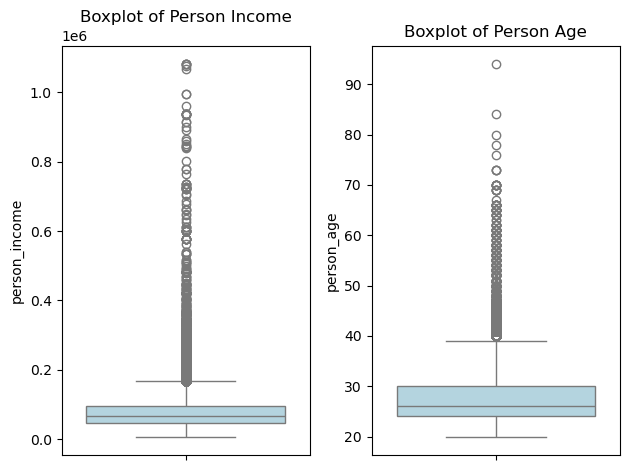

In [27]:
# Replacing Outliers 
median_age = df['person_age'].median()
df['person_age'] = df['person_age'].apply(lambda x: median_age if x > 100 else x)

# Find the indices of the two highest income rows
top_income_indices = df.sort_values(by='person_income', ascending=False).head(2).index
# Drop those rows from the DataFrame
df = df.drop(index=top_income_indices)

# Statistical summary
def print_summary(column_name):
    stats = df[column_name].describe()
    print(f"\nSummary of {column_name.capitalize()}:")
    for stat_name, value in stats.items():
        print(f"{stat_name:>6}: {value:,.2f}")

print_summary('person_income')
print_summary('person_age')

# Boxplot for Income
plt.subplot(1, 2, 1)
sns.boxplot(y=df['person_income'], color='lightblue')
plt.title('Boxplot of Person Income')

# Boxplot for Age
plt.subplot(1, 2, 2)
sns.boxplot(y=df['person_age'], color='lightblue')
plt.title('Boxplot of Person Age')

plt.tight_layout()
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44984 entries, 0 to 44999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44984 non-null  float64
 1   person_gender                   44984 non-null  int32  
 2   person_education                44984 non-null  int32  
 3   person_income                   44984 non-null  float64
 4   person_emp_exp                  44984 non-null  int64  
 5   loan_amnt                       44984 non-null  float64
 6   loan_int_rate                   44984 non-null  float64
 7   loan_percent_income             44984 non-null  float64
 8   cb_person_cred_hist_length      44984 non-null  float64
 9   credit_score                    44984 non-null  int64  
 10  previous_loan_defaults_on_file  44984 non-null  int32  
 11  loan_status                     44984 non-null  int64  
 12  person_home_ownership_OTHER     44984

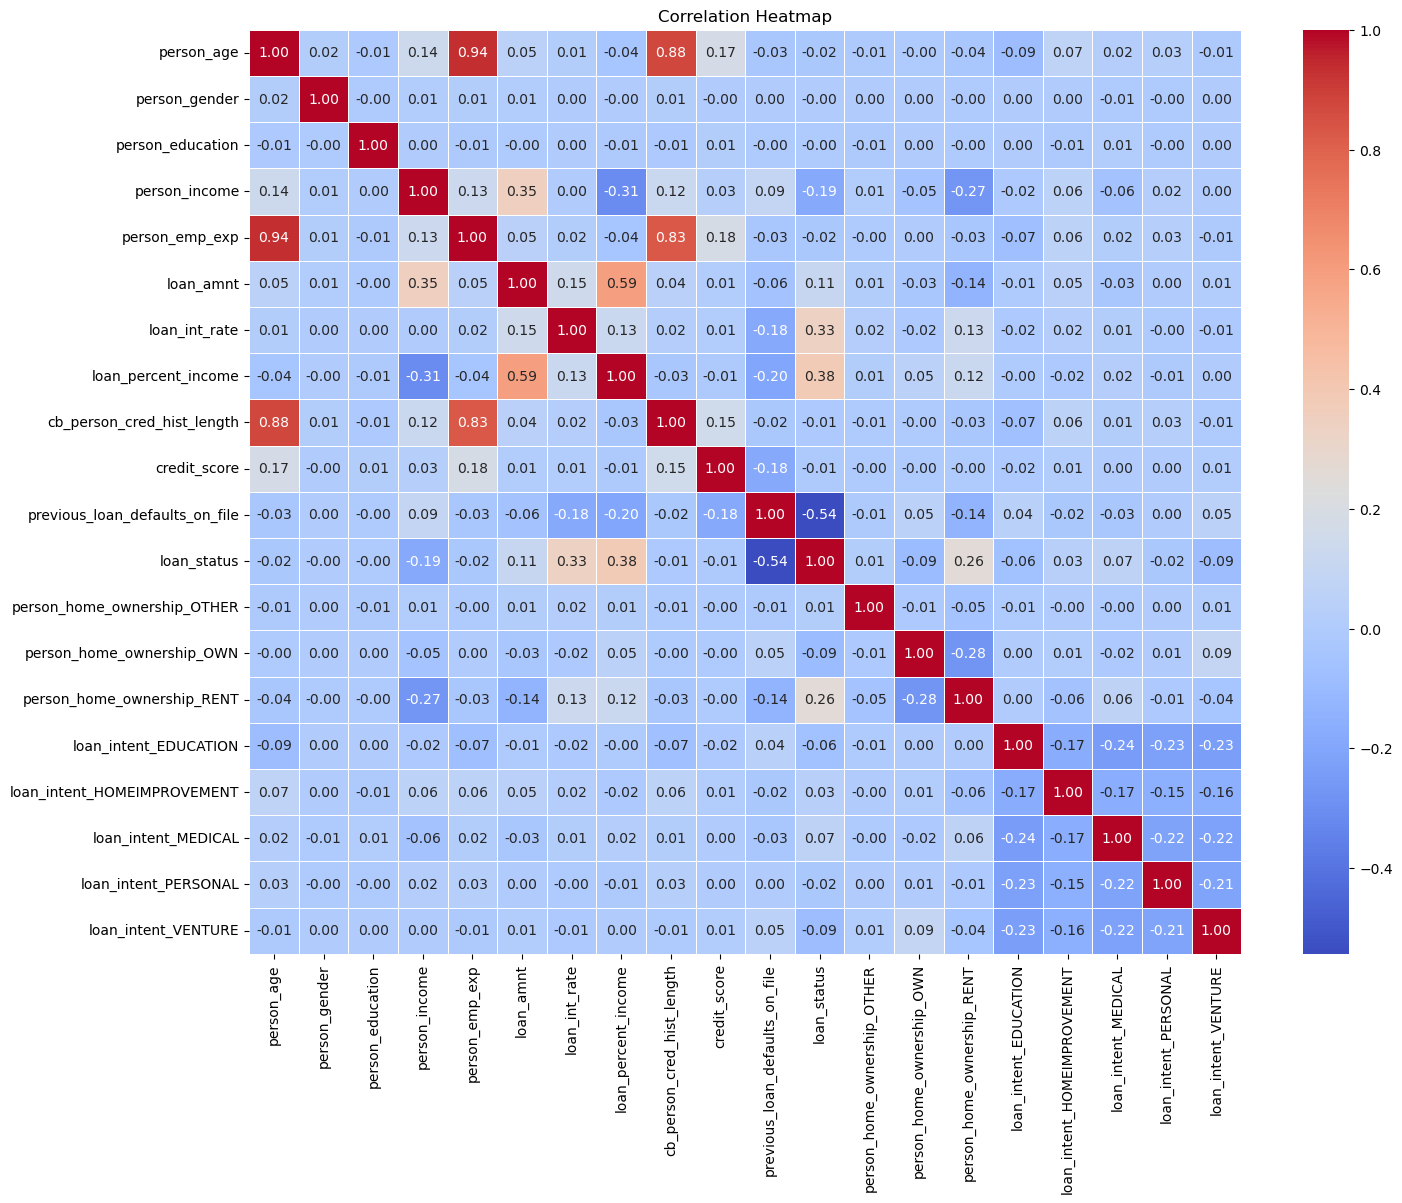

In [25]:
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

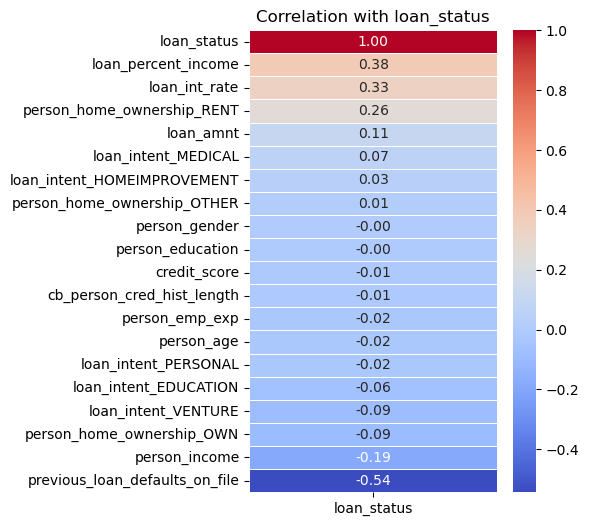

In [26]:
# Extract correlation values with respect to the target variable (loan_status)
target_variable = 'loan_status'
target_corr = corr_matrix[[target_variable]].sort_values(by=target_variable, ascending=False)

# Plotting the heatmap for correlation values with respect to the target variable
plt.figure(figsize=(4, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Correlation with {target_variable}')
plt.show()

In [28]:
df.to_csv('loan_data_preprocessed.csv', index=False)